# Data Science and Visualization (RUC F2023)

## Miniproject Report

## Remarks:

1. This template serves as a guideline for structuring your miniproject report. You're supposed to follow the provided sections overall, but you're allowed to make changes or adjustments whenever it's appropriate for your particular project. 

    * For example, in each section provided below, you may use many cells instead of just one. 

    * You may also add subsections if you want. If necessary, you can also add or remove sections.


2. You should rename this notebook file to 'Group_xxx_report.ipynb' where 'xxx' is your group number in our [padlet] (https://padlet.com/luhua/dsv-f23-mini-project-group-formation-sgw8mxkajzhh0tli). This notebook should be submitted to Digital Exam in time.

3. Make sure the data you use is available somewhere and accessible to the examiner and censor. You may upload your data together with this report to Digital Exam, or put it online and provide the URL to it in this report. It's your own responsibility to ensure the data accessibility. 

4. Any text in '[ ]' throughout the template should be replaced by appropriate content that you're supposed to generate. Also remember to remove the pairs of '[' and ']' in the final report. 

5. Give sufficient descriptive and explanative information by using Markdown cells and/or comments in Python code.

6. Remove this cell in the final report.

7. If you have questions, please email to luhua@ruc.dk.

## Project Title: [Which features of cancer cells determine cancer type]

## Group Members:
* [Zainab Ahmad, Hum-Tek, 6 semester, zaah@ruc.dk]
* [Nikki Dilling-Hansen, Hum-Tek, 6 semester, nikki@ruc.dk]


## Abstract

[Here, you need to write ~5 sentences to describe the main points of your project, including but not limited to, dataset, research questions, data science methods, findings from the data, your condlusions and remarks.]

## 0. Setup and Data

Import the modules needed for the project.

In [68]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
import seaborn as sns
#for checking if data needs scaling
import matplotlib.pyplot as plt
#for training models
from sklearn.model_selection import train_test_split
from tabulate import tabulate


### Data description:

[Here you should provide a description of your dataset and where to find the dataset.]

## 1. Loading the Data

[Below you should load the data, display a part of the data, show the shape (number of rows and that of columns) of the data, and show the statistics of the data.]

In [8]:
data = pd.read_csv("cancer.csv")

In [3]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


## 2. Data Preprocessing

[Below you should handle the missing values, convert data types, apply data scaling and so on, if any of them is needed.]

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [5]:
#We are checking if the dataset has any missing values by counting the number of missing values in the columns
#There are no missing values
data.isnull().sum(axis=0)

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

In [9]:
#Checking if our data needs scaling
data.describe()
#min is smaller than 0.5, so there are more 0's
#count number of M's and B's

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
count,5.690000e+02,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,3.037183e+07,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,...,25.677223,107.261213,880.583128,0.132369,0.254265,0.272188,0.114606,0.290076,0.083946,NaN
std,1.250206e+08,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,...,6.146258,33.602542,569.356993,0.022832,0.157336,0.208624,0.065732,0.061867,0.018061,NaN
min,8.670000e+03,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,...,12.020000,50.410000,185.200000,0.071170,0.027290,0.000000,0.000000,0.156500,0.055040,NaN
25%,8.692180e+05,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,...,21.080000,84.110000,515.300000,0.116600,0.147200,0.114500,0.064930,0.250400,0.071460,NaN
50%,9.060240e+05,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,...,25.410000,97.660000,686.500000,0.131300,0.211900,0.226700,0.099930,0.282200,0.080040,NaN
75%,8.813129e+06,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,...,29.720000,125.400000,1084.000000,0.146000,0.339100,0.382900,0.161400,0.317900,0.092080,NaN
max,9.113205e+08,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,...,49.540000,251.200000,4254.000000,0.222600,1.058000,1.252000,0.291000,0.663800,0.207500,NaN


In [10]:
#Annotating the labels
data['diagnosis'].replace(['B', 'M'],
                        [0, 1], inplace=True)

In [61]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [36]:
data['diagnosis'].head()

0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

In [11]:
##Counting OUTLIERS
data2 = data.columns.drop(['diagnosis', 'id'])
def countOutlier(col):

    # Calculate the interquartile range (IQR)
    Q1 = data[col].quantile(0.05) #or 0.25
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1

    # Calculate the upper and lower bounds for outliers
    upper_bound = Q3 + 1.5 * IQR
    lower_bound = Q1 - 1.5 * IQR

    # Find the number of outliers in the column
    num_outliers = len(data[(data[col] > upper_bound) | (data[col] < lower_bound)])

    # Find the percentage of outliers in the column
    percent_outliers = num_outliers / len(data) * 100

    # Print the percentage of outliers in the column
    print(f"The percentage of outliers in {col} is {percent_outliers:.2f}%")

for col in data2:
    countOutlier(col)
    
##VISUALISE OUTLIERS
#maybe some data
#then test on different outliers and see the result (model and visualization)
#distribution of data is different (depends on the dataset)

The percentage of outliers in radius_mean is 0.88%
The percentage of outliers in texture_mean is 0.18%
The percentage of outliers in perimeter_mean is 0.88%
The percentage of outliers in area_mean is 2.28%
The percentage of outliers in smoothness_mean is 0.18%
The percentage of outliers in compactness_mean is 1.58%
The percentage of outliers in concavity_mean is 1.76%
The percentage of outliers in concave points_mean is 0.88%
The percentage of outliers in symmetry_mean is 0.35%
The percentage of outliers in fractal_dimension_mean is 1.23%
The percentage of outliers in radius_se is 5.10%
The percentage of outliers in texture_se is 1.58%
The percentage of outliers in perimeter_se is 5.45%
The percentage of outliers in area_se is 8.79%
The percentage of outliers in smoothness_se is 2.28%
The percentage of outliers in compactness_se is 3.34%
The percentage of outliers in concavity_se is 2.11%
The percentage of outliers in concave points_se is 1.05%
The percentage of outliers in symmetry_se

Text(0.5, 0, 'area')

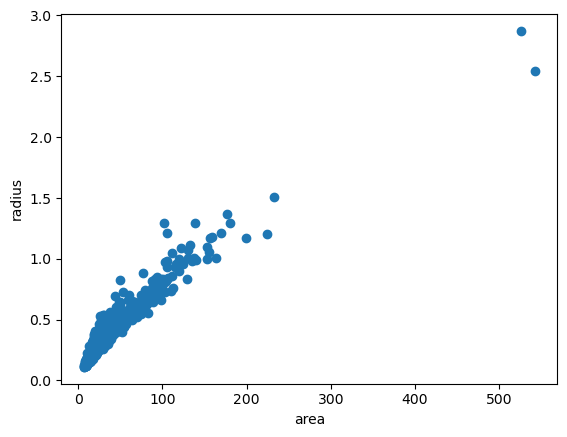

In [8]:
plt.scatter(data.area_se, data.radius_se)
plt.ylabel('radius')
plt.xlabel('area')

Text(0.5, 0, 'index')

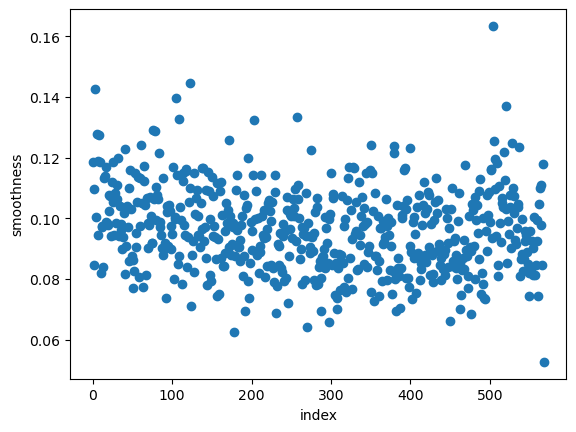

In [20]:
plt.scatter(data.index, data.smoothness_mean)
plt.ylabel('smoothness')
plt.xlabel('index')

In [12]:
col = data.columns.drop(["id", "Unnamed: 32"])
X = data[col] #features for scaling


In [13]:
##Data SCcaling
# initialize MinMaxScaler

##Why not normalization?!?!
#because their is a big difference between minimum and maximum
scaler = MinMaxScaler()

#Scaling for every feature
X_scaled = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

Text(0.5, 0, 'area')

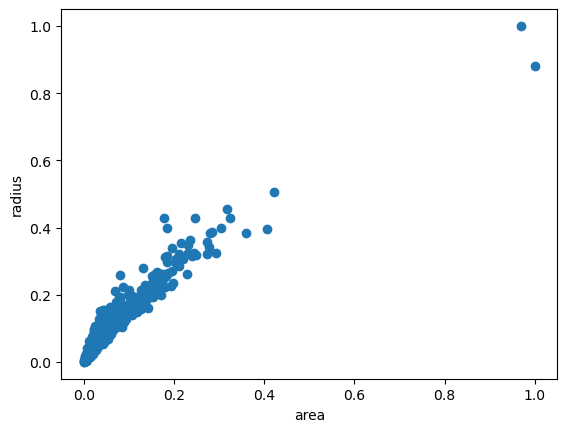

In [61]:
plt.scatter(X_scaled.area_se, X_scaled.radius_se)
plt.ylabel('radius')
plt.xlabel('area')

Text(0.5, 0, 'index')

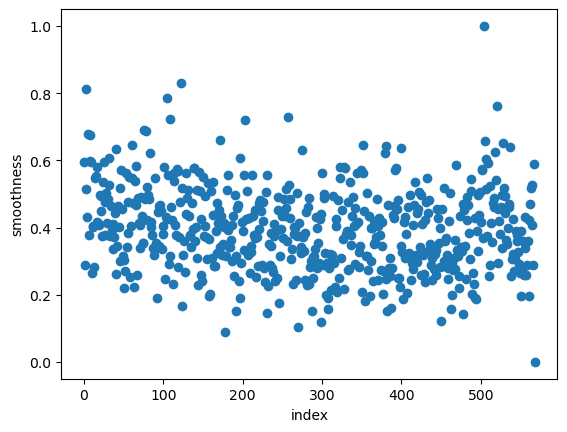

In [21]:
plt.scatter(X_scaled.index, X_scaled.smoothness_mean)
plt.ylabel('smoothness')
plt.xlabel('index')

In [14]:
X_scaled.describe()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,...,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000
mean,0.372583,0.338222,0.323965,0.332935,0.216920,0.394785,0.260601,0.208058,0.243137,0.379605,...,0.296663,0.363998,0.283138,0.170906,0.404138,0.220212,0.217403,0.393836,0.263307,0.189596
std,0.483918,0.166787,0.145453,0.167915,0.149274,0.126967,0.161992,0.186785,0.192857,0.138456,...,0.171940,0.163813,0.167352,0.139932,0.150779,0.152649,0.166633,0.225884,0.121954,0.118466
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.223342,0.218465,0.216847,0.117413,0.304595,0.139685,0.069260,0.100944,0.282323,...,0.180719,0.241471,0.167837,0.081130,0.300007,0.116337,0.091454,0.223127,0.185098,0.107700
50%,0.000000,0.302381,0.308759,0.293345,0.172895,0.390358,0.224679,0.144189,0.166501,0.369697,...,0.250445,0.356876,0.235320,0.123206,0.397081,0.179110,0.181070,0.343402,0.247782,0.163977
75%,1.000000,0.416442,0.408860,0.416765,0.271135,0.475490,0.340531,0.306232,0.367793,0.453030,...,0.386339,0.471748,0.373475,0.220901,0.494156,0.302520,0.305831,0.554639,0.318155,0.242949
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## 3. Exploratory Data Analysis

[Below you can conduct EDA of your data, e.g., ask some questions and try to answer them by accessing the data properly and making some visualizations.]

In [15]:
#Lets see the frequency of each type of cancer 
series_1 = data.groupby(['diagnosis'])['id'].count()
series_1

diagnosis
0    357
1    212
Name: id, dtype: int64

The conclusion is that Benign cancer is found more frequantly in the data set

<BarContainer object of 2 artists>

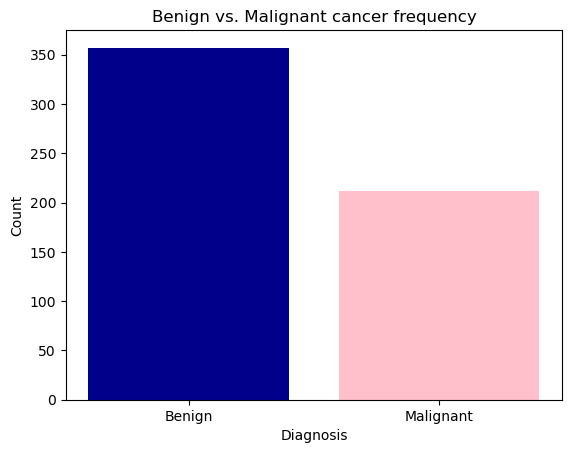

In [37]:
plt.title('Benign vs. Malignant cancer frequency')
#plt.yticks(series_1.values)
plt.xticks([0,1], ['Benign', 'Malignant'])
plt.xlabel('Diagnosis')
plt.ylabel('Count')
# Setting the colors of the bars
colors = ['darkblue', 'pink']


plt.bar(series_1.index, series_1.values, color=colors)


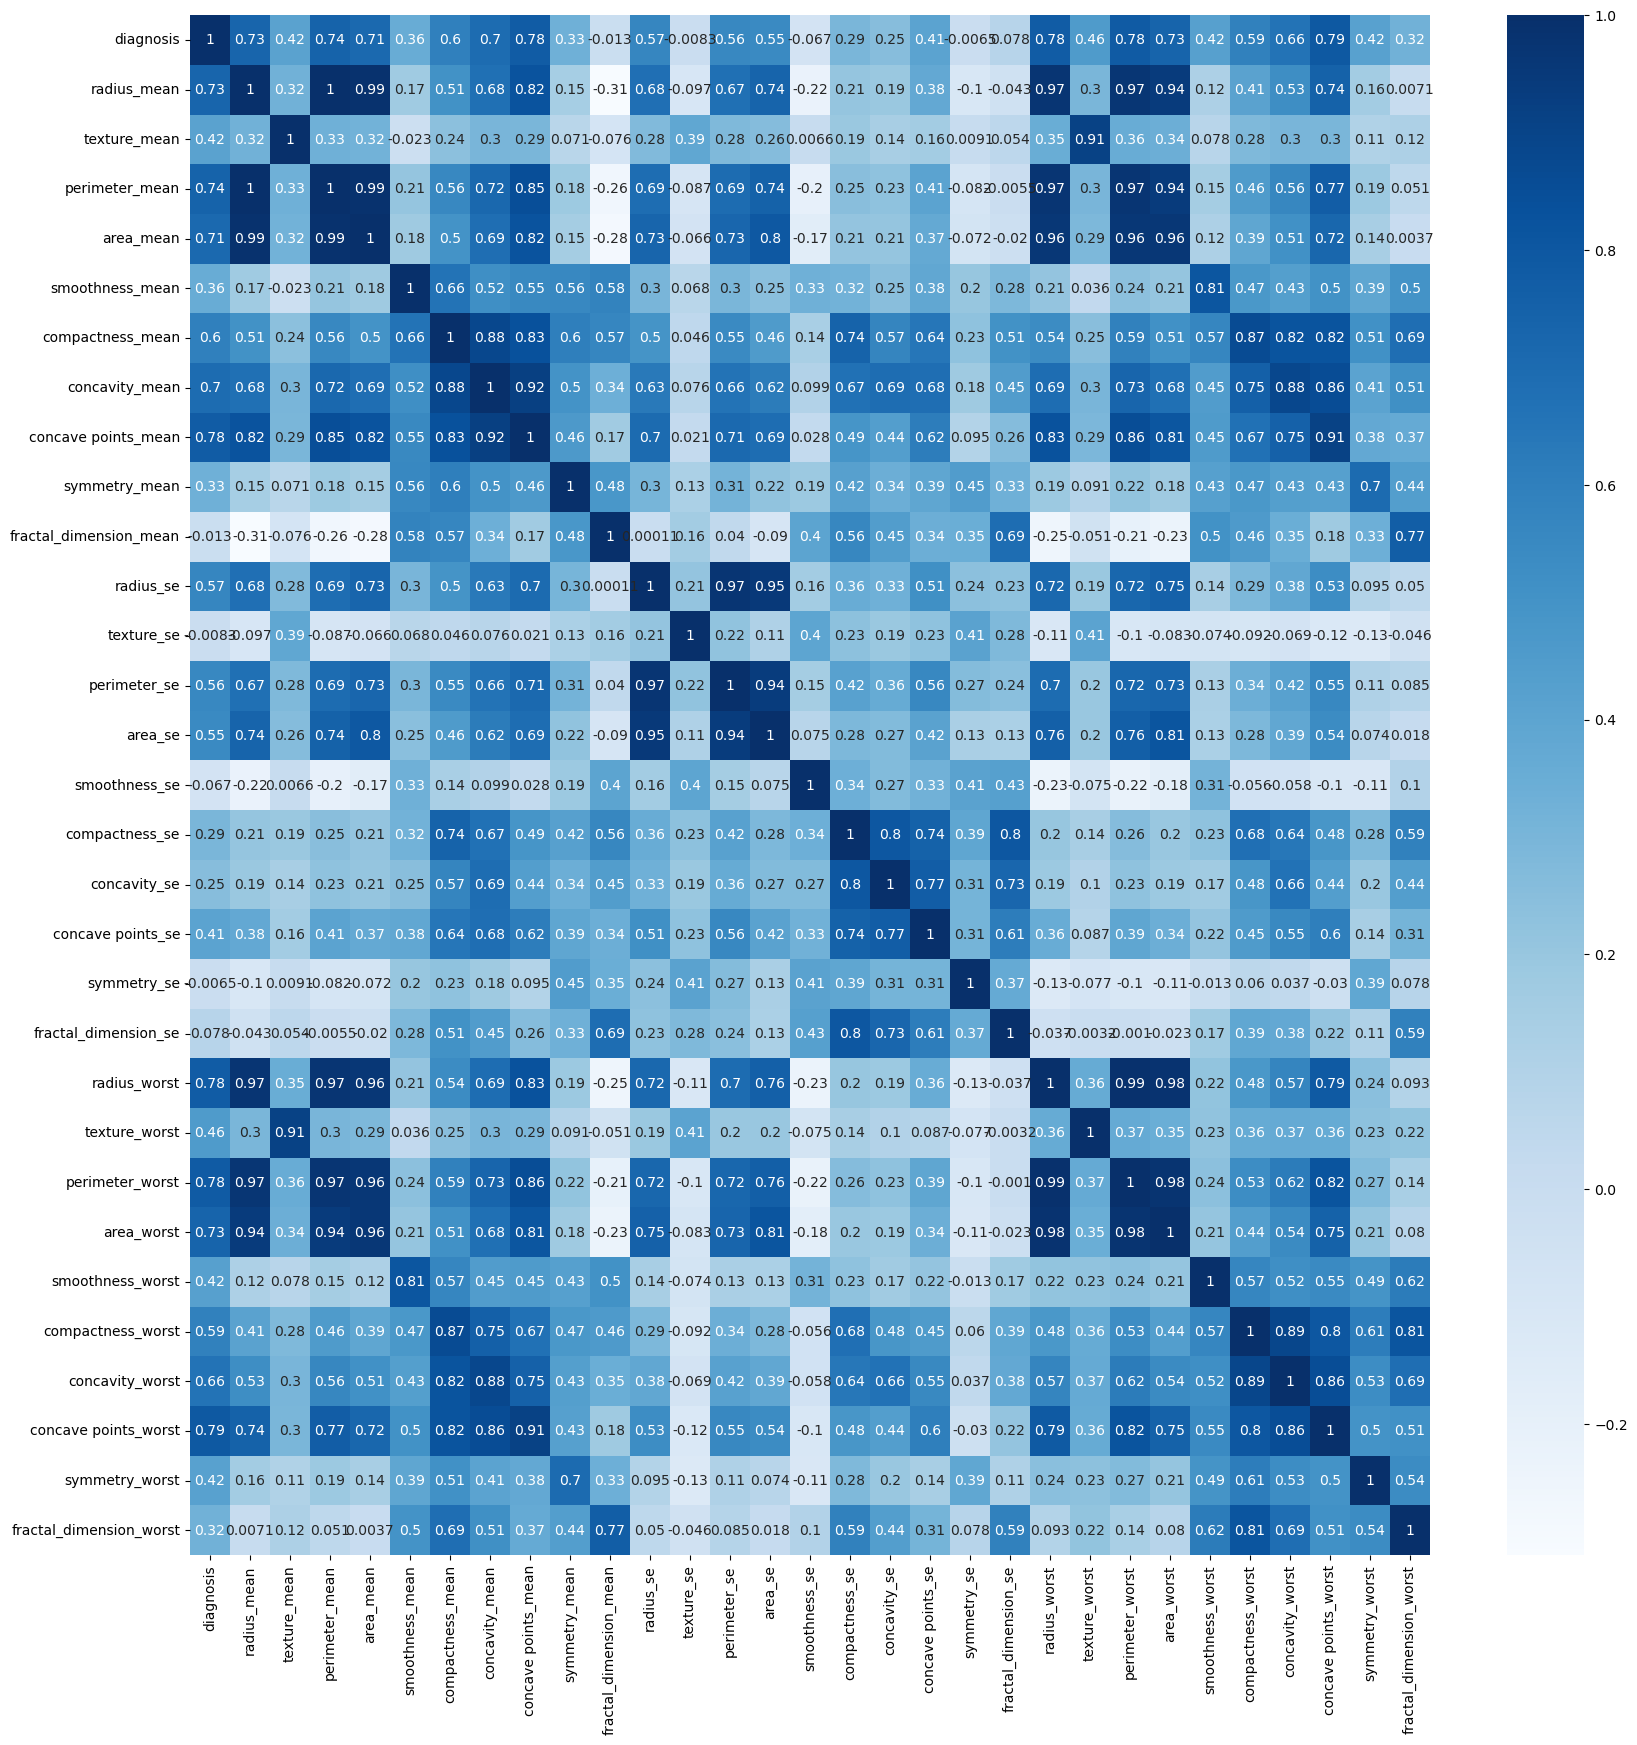

In [20]:
#We want to see the relationships between different features to see if there is correlation between them
plt.figure(figsize=(20,20))
sns.heatmap(X_scaled.corr(),cbar=True,annot=True,cmap='Blues')
plt.show()
#hypothesis before running the model
#random forrest will show most important feature

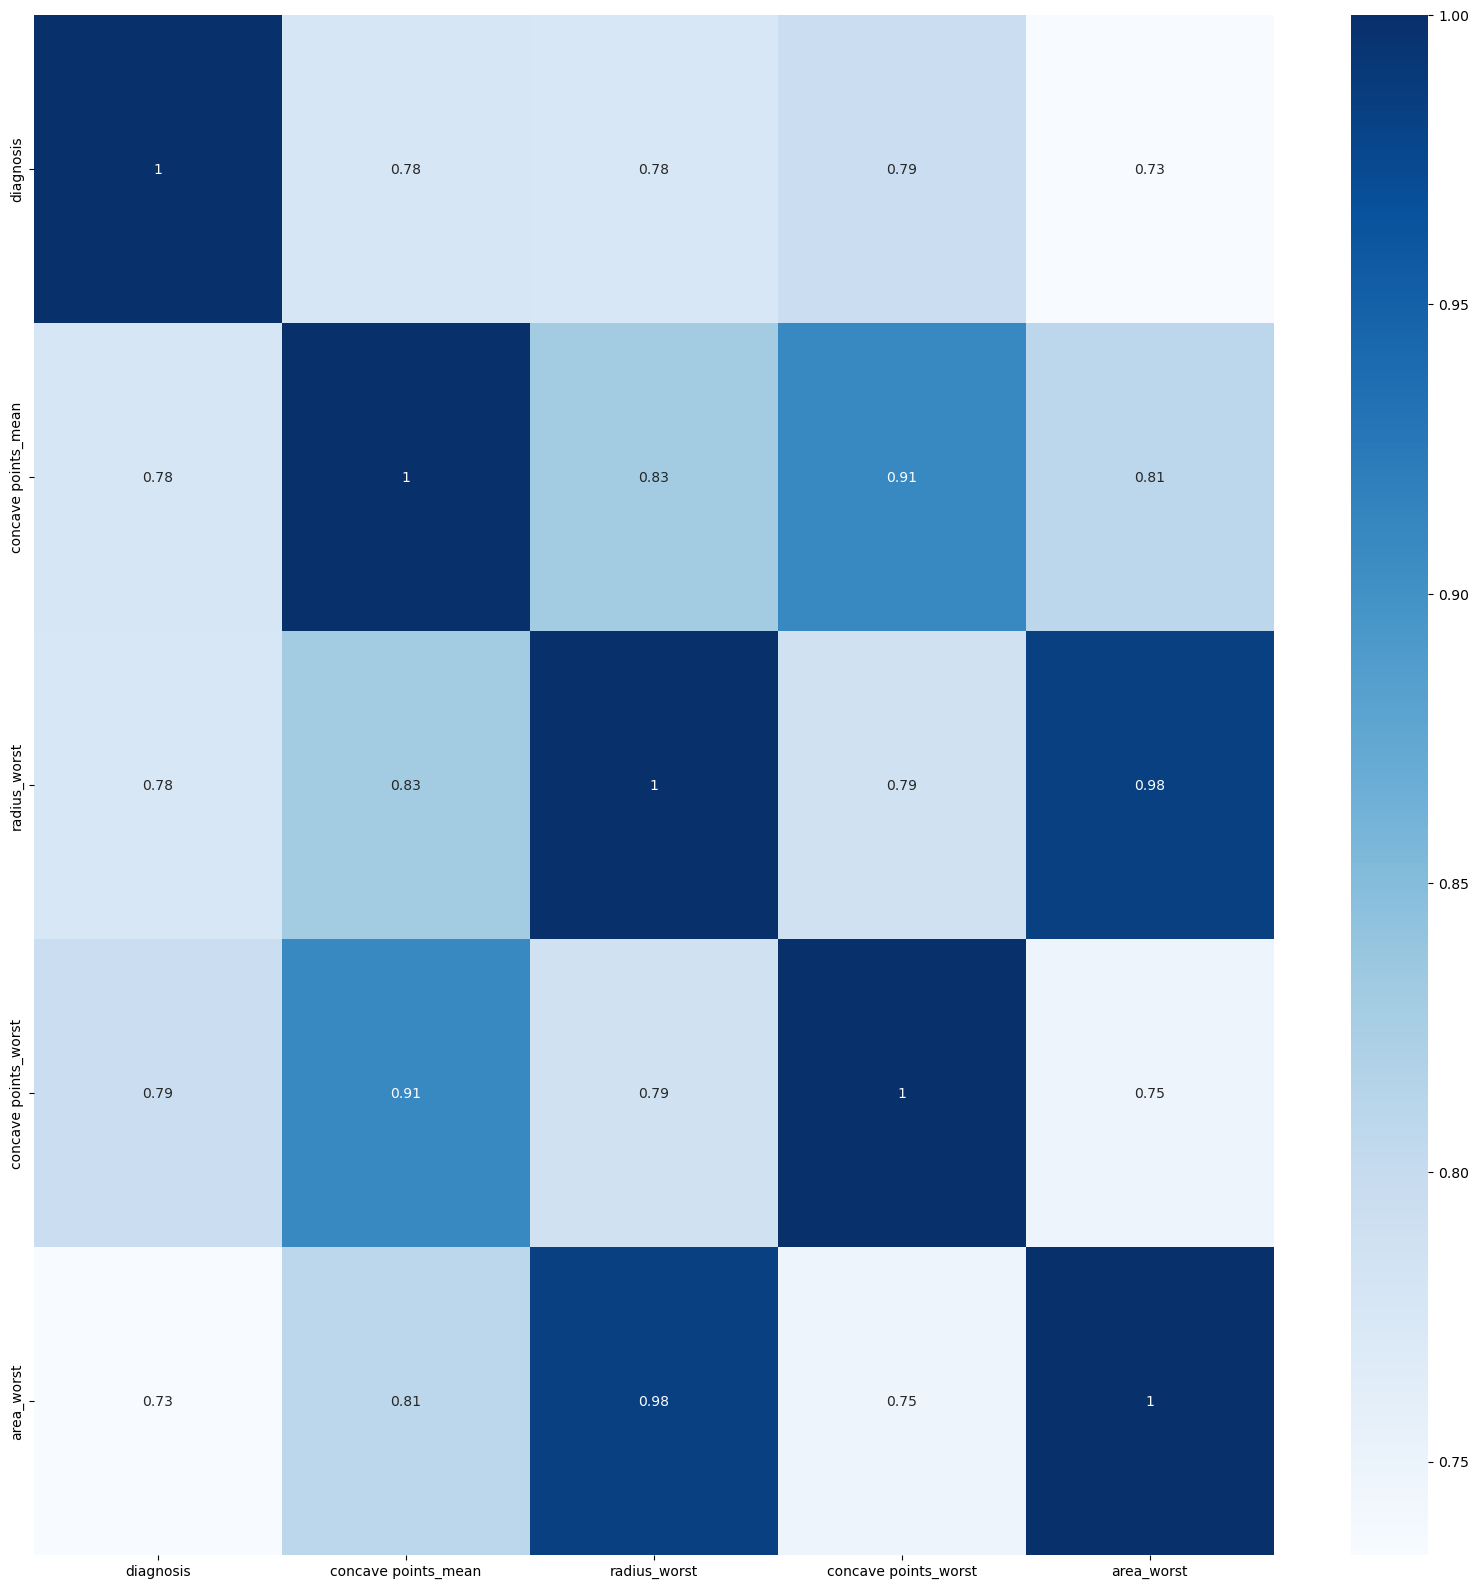

In [50]:
#looking for most important feature
#show an exact features and put in heatmap
#Hypothesys: these features are the most importantin relation to diagnosis
#and feature "concave points_worst is the most important, because it has the highest value on the heatmap
hypo = ["diagnosis", "concave points_mean", "radius_worst", "concave points_worst", "area_worst"]
plt.figure(figsize=(20,20))
sns.heatmap(X_scaled[hypo].corr(),cbar=True,annot=True,cmap='Blues')
plt.show()

In [75]:
M = X_scaled[X_scaled.diagnosis == 1] #Diagnosis transfers all values of 1 to M data
B = X_scaled[X_scaled.diagnosis == 0] #Diagnosis transfers all values of 0 to B data
features_data = X_scaled.columns.drop(['diagnosis', 'radius_mean'])

def drawScatterPlot():
    for col in features_data:
        plt.scatter(M.radius_mean, M[col], label="Malignant", alpha=0.3)
        plt.scatter(B.radius_mean, B[col], label="Benign", alpha=0.3)

        plt.xlabel("radius_mean")
        plt.ylabel(col)

        plt.legend()
        plt.show()


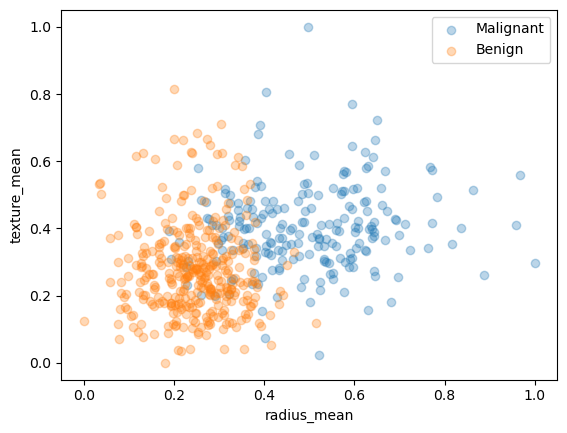

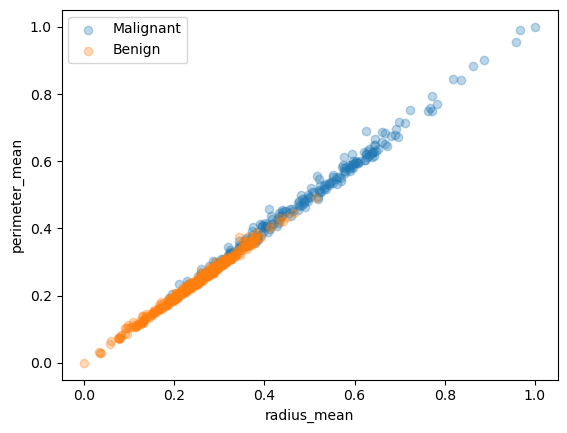

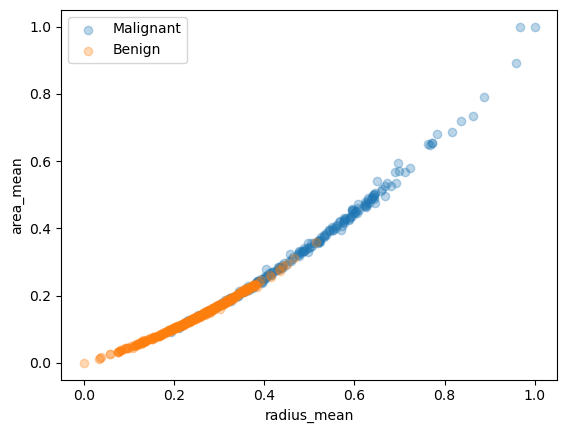

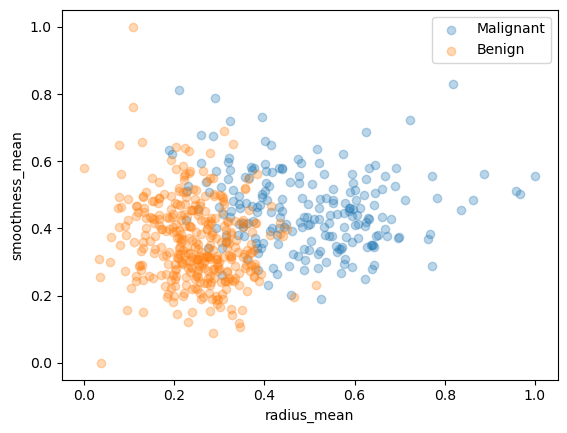

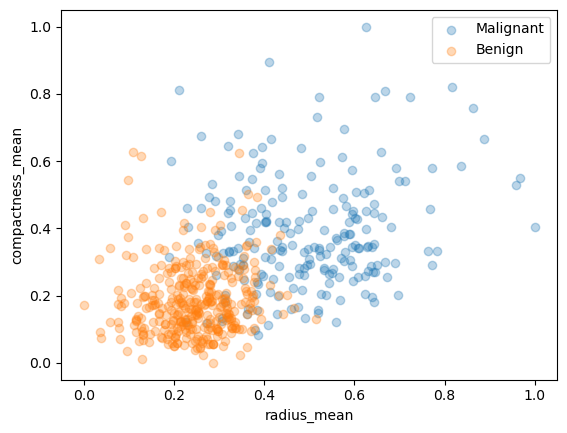

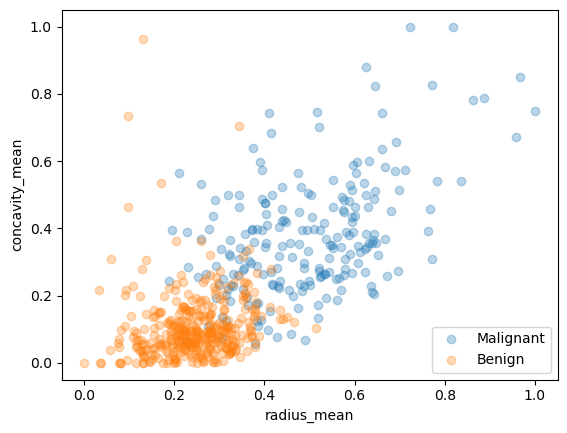

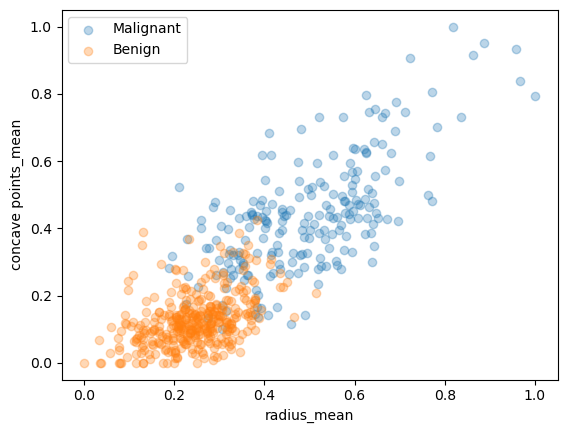

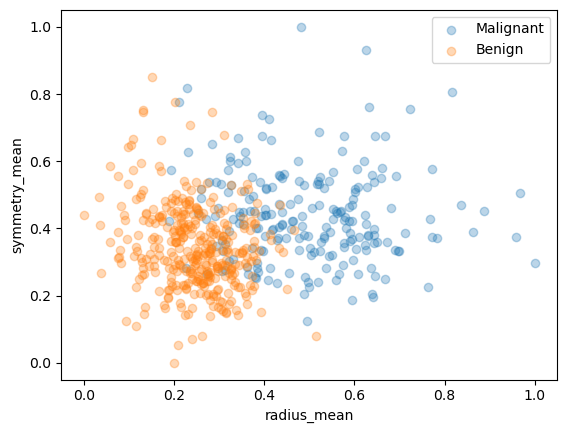

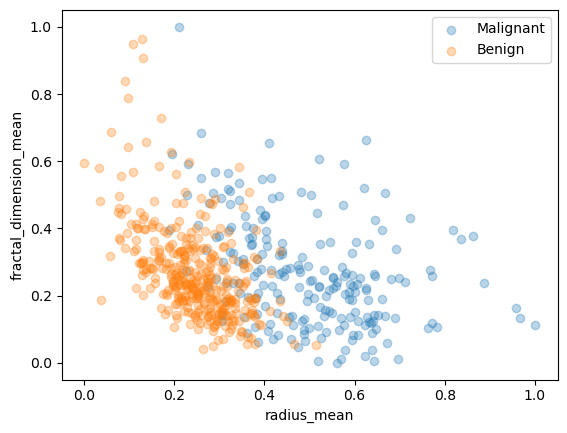

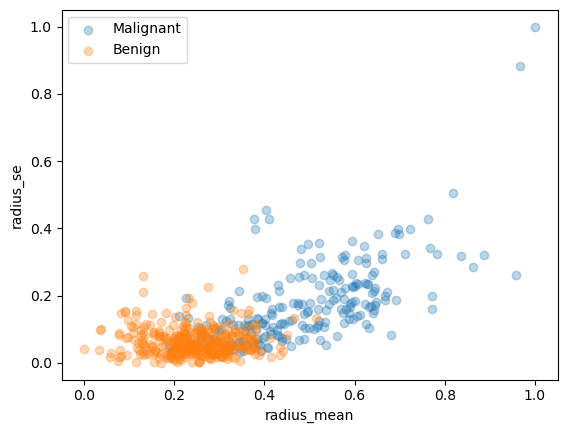

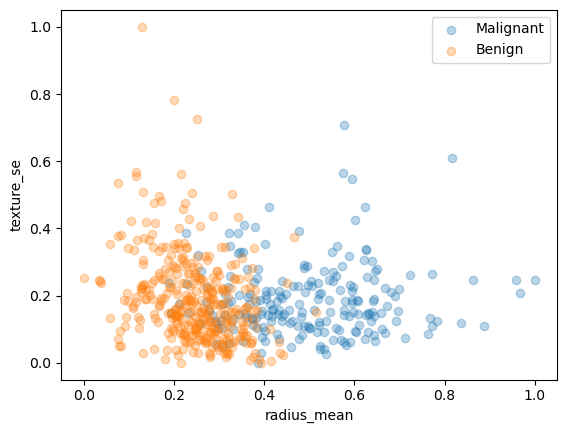

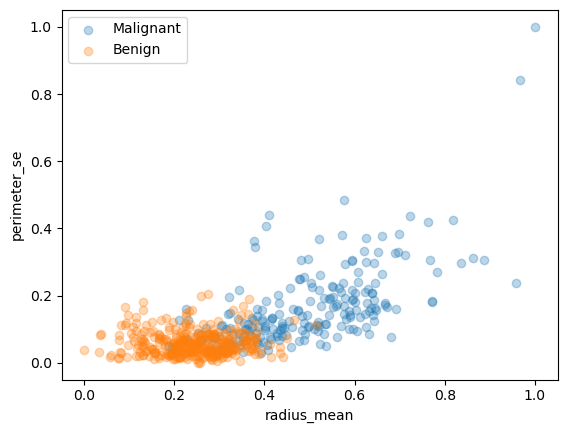

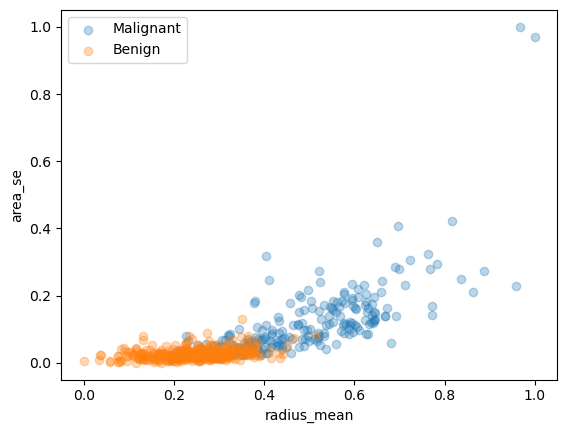

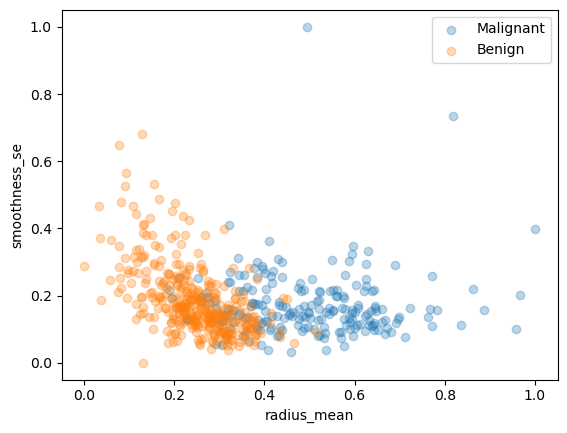

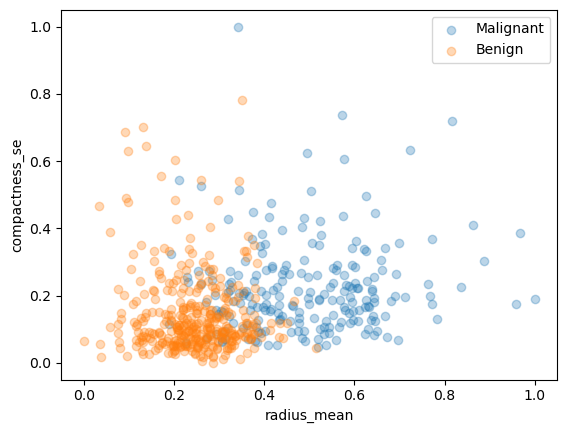

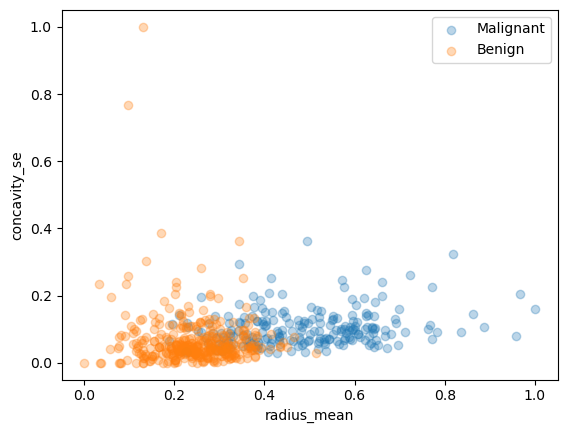

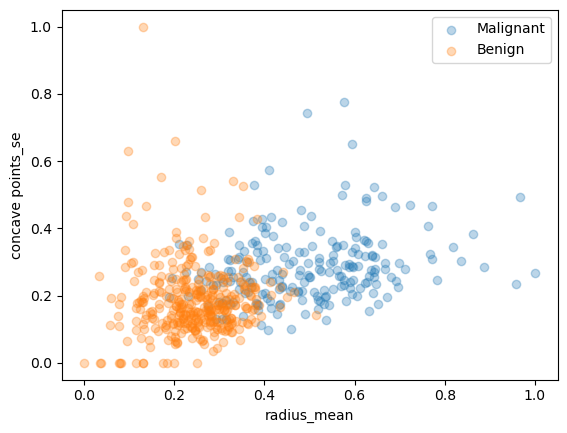

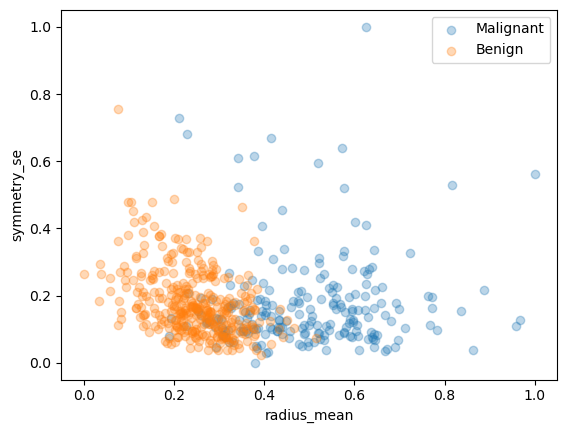

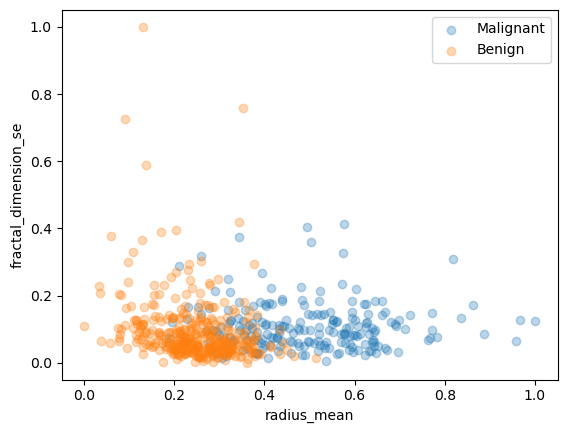

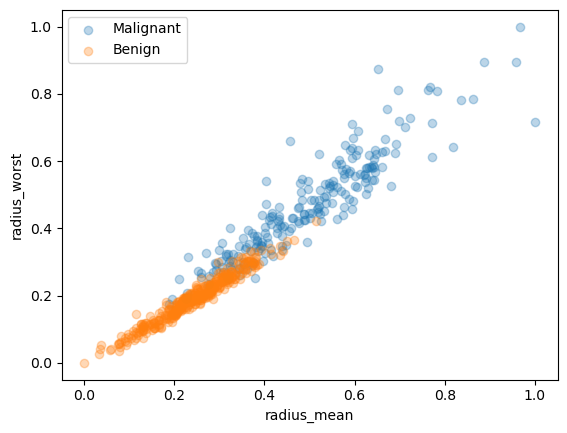

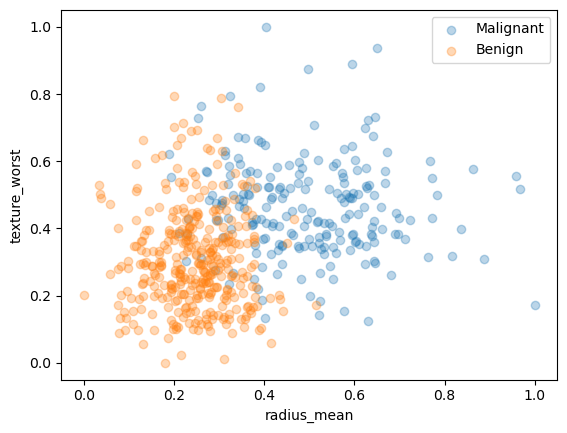

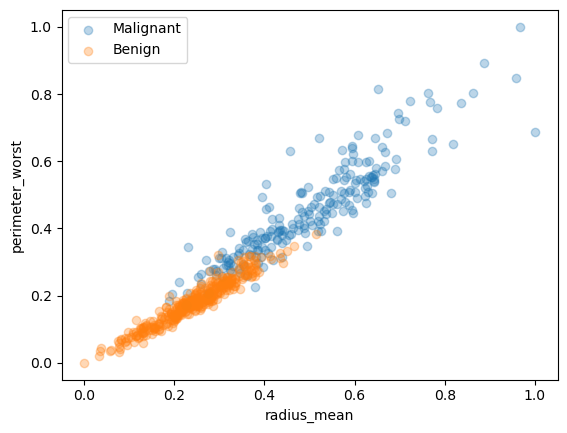

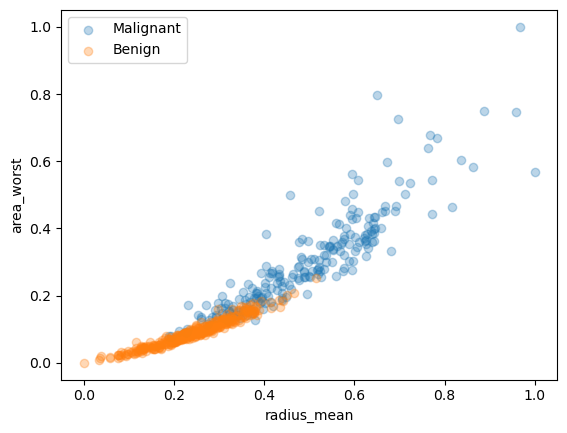

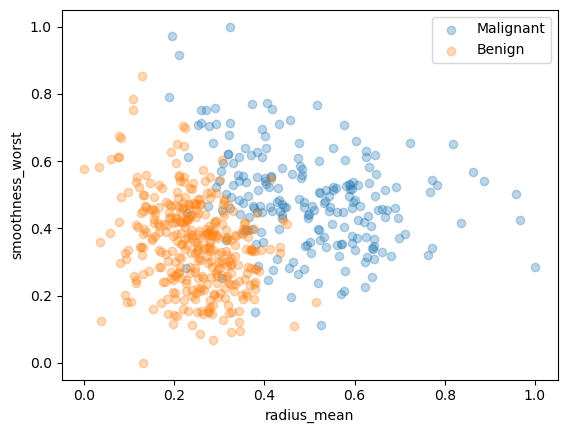

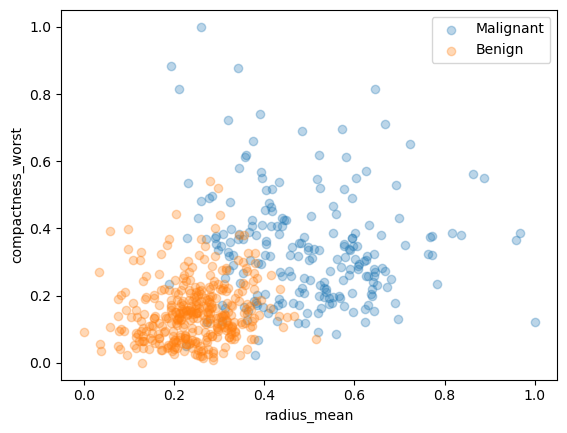

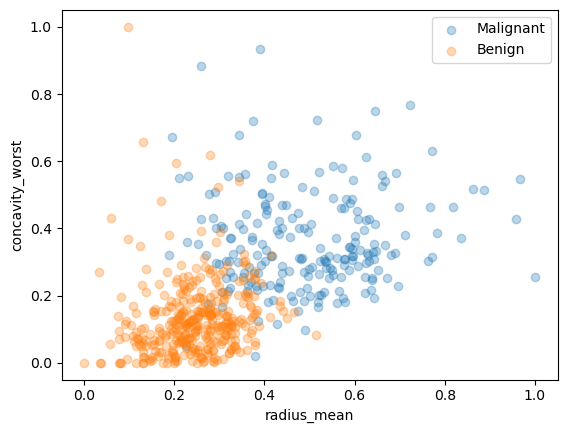

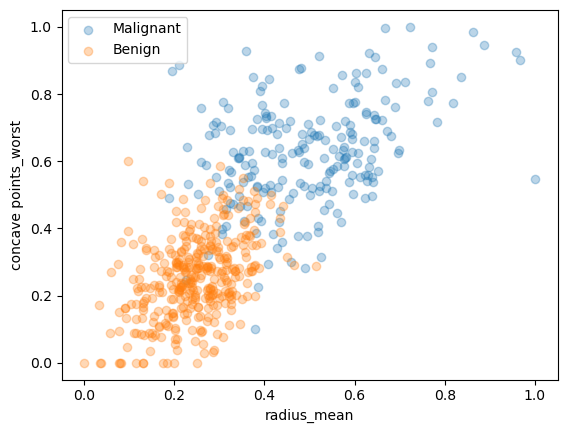

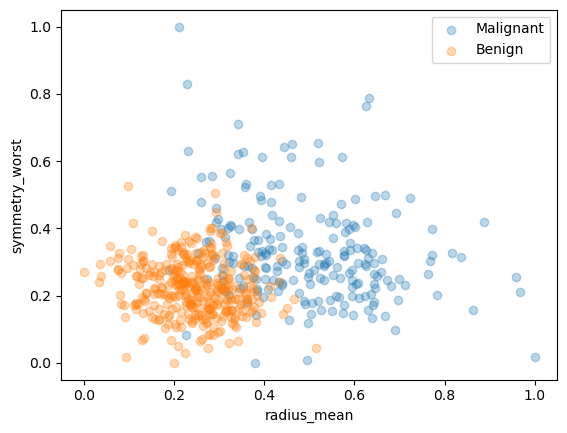

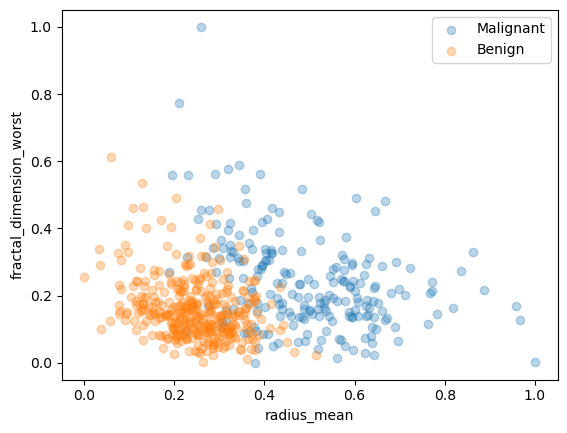

In [76]:
#Drawing a scatter plot for all features against "radius_mean", for future feature selection
drawScatterPlot()

## 4. Data Modelling

[Below you apply machine learning models and other data science methods to your data, e.g., classification, regression, clustering, and association rule mining. You should do at least one of them. Give a description of what you do here.]

### 4.1. Feature Selection

[Decide which features you want to use and obtain them properly from the original data.]

In [ ]:
# we want to build a model on features where the correlation between diagnosis and other features is above 0.70
feauture_sel = ["diagnosis", "concave points_mean", "radius_worst", "concave points_worst", "radius_mean", "perimeter_mean", "area_mean", "area_worst"]

### 4.2 Model Construction and Validation

[Construct the model and validate the model design if necessary.]

In [54]:
# Splitting the dataset into features and target variable
X = X_scaled.drop('diagnosis', axis=1)
y = X_scaled['diagnosis']
# Splitting the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### 4.3 Model Application and Performance Evaluation

[Apply the model and evaluate its performance]

In [ ]:
#Because our data is binary, we will use classification models from supervised learnig like: 
#Random forest tree and KNN to compare the results

In [55]:
# Training a Random Forest model with 100 trees
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Extracting feature importance scores
importance_scores = rf.feature_importances_

# Printing feature importance scores in descending order
for feature, score in sorted(zip(X.columns, importance_scores), key=lambda x: x[1], reverse=True):
    print(feature, score)
#visualise as a bar chart

area_worst 0.15389236463205394
concave points_worst 0.14466326620735528
concave points_mean 0.10620998844591638
radius_worst 0.07798687515738047
concavity_mean 0.06800084191430111
perimeter_worst 0.06711483267839194
perimeter_mean 0.053269746128179675
radius_mean 0.048703371737755234
area_mean 0.04755500886018552
concavity_worst 0.031801595740040434
area_se 0.022406960160458473
texture_worst 0.021749011006763207
compactness_worst 0.020266035899623565
radius_se 0.02013891719419153
compactness_mean 0.013944325074050485
texture_mean 0.013590877656998469
perimeter_se 0.01130301388178435
smoothness_worst 0.010644205147280952
symmetry_worst 0.010120176131974357
concavity_se 0.009385832251596627
smoothness_mean 0.007285327830663239
fractal_dimension_se 0.00532145634222884
compactness_se 0.005253215538990106
fractal_dimension_worst 0.005210118545497296
texture_se 0.004723988073894702
smoothness_se 0.004270910110504497
symmetry_se 0.004018418617722808
fractal_dimension_mean 0.0038857721093275
s

In [73]:
# Making predictions on the test set
y_pred = rf.predict(X_test)

# Evaluating the accuracy of the model
accuracyR_F = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracyR_F)

Accuracy: 0.9649122807017544


In [ ]:
#Trying KNN model

In [74]:
 X_train2, X_test2, y_train2, y_test2 = train_test_split(X, y, test_size=0.7, random_state=1)

        
# Model intializing
knn = KNeighborsClassifier(n_neighbors=2)

# Training (very light compared to an eager learner)
knn.fit(X_train2, y_train2)

# Validation/Test
y_pred2 = knn.predict(X_test2)

print("KNN with training_percent={}, k={}:\r".format(0.7, 2))
            
# Get the accuracy from metrics
accuracyKNN = metrics.accuracy_score(y_test2, y_pred2)
print("Accuracy: {}\r\n".format(accuracyKNN))


KNN with training_percent=0.7, k=2:
Accuracy: 0.9548872180451128



C:\Users\ndill\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [59]:
y_pred

array([0., 1., 1., 0., 0., 1., 1., 1., 1., 0., 0., 1., 0., 1., 0., 1., 0.,
       0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       0., 0., 1., 0., 1., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1.,
       1., 0., 0., 0., 0., 0., 1., 1., 0., 0., 1., 1., 0., 0., 0., 1., 1.,
       0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 1.,
       1., 1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 1., 1., 0.,
       1., 1., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1.])

### 4.4 Visualize and Analyze Your Results/Findings from Data Modelling

[Here you may visualize the modeling results, and/or analyze/interprete its meanings.]

In [83]:
#count 0's and 1's in orediction
#compare models in a table

In [82]:
table = [["KNN", accuracyKNN, 0.7],["Random forest", accuracyR_F, 0.2]]
print(tabulate(table, headers = ["Model", "Accuracy", "Data split"]))

Model            Accuracy    Data split
-------------  ----------  ------------
KNN              0.954887           0.7
Random forest    0.964912           0.2


## 5. Conclusion and Discussion

[Here you may draw your conclusion based on the previous sections, and discuss the pros and cons of the project, and propose something for future work.]